In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
# engine = create_engine("../Resources/sqlite:///hawaii.sqlite")

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table. Assigning the classes to a variable
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

latest_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
print(f"The most recent date in Measurement data set is {latest_date}")

The most recent date in Measurement data set is ('2017-08-23',)


12 months from the most recent date is:  2016-08-23


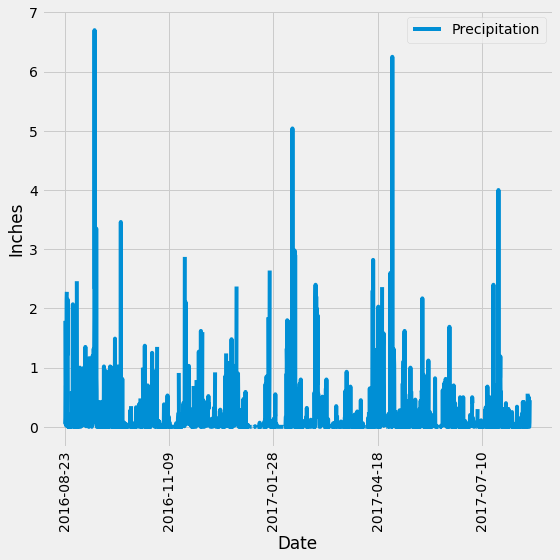

In [21]:
# prcp stands for precipitation

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("12 months from the most recent date is: ", last_year)

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp_scores=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores, columns = ["Date", "Precipitation"])
prcp_df.set_index(['Date'], inplace = True )

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by="Date", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(figsize=(8,8), rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.savefig("Images/prcp_bargraph.png")
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
status_count = session.query(Measurement.station).distinct().count()
print(f"There is {status_count} total stations")

There is 9 total stations


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
engine.execute('SELECT measurement.date,measurement.prcp FROM measurement LIMIT 5').fetchall()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station == active_stations[0][0]).all()
results



[(54.0, 85.0, 71.66378066378067)]

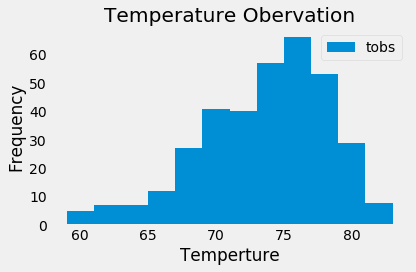

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obser = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == active_stations[0][0]).\
    filter(Measurement.date >= last_year).order_by(Measurement.date.desc()).all()

temp_df = pd.DataFrame(temp_obser, columns = ['Date', 'Temperature'])
temp_df.set_index(['Date'], inplace = True)
temp_df

# Plotting histogram
plt.hist(x = temp_df ['Temperature'], bins=12,\
          histtype='bar', align='mid', orientation='vertical')
plt.grid()
plt.title("Temperature Obervation")
plt.legend(["tobs"])
plt.xlabel("Temperture")
plt.ylabel("Frequency")
plt.savefig("Images/Temp_Histogram.png")
plt.tight_layout()
plt.show()

# Close session

In [19]:
# Close Session
session.close()